<a href="https://colab.research.google.com/github/rajesha123/samsung/blob/main/samsung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cell 1: Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Machine Learning & decomposition
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix

# Interactive plots
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

warnings.filterwarnings('ignore')
%matplotlib inline

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [ ]:
# Cell 2: Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("Iris dataset loaded!")
print(f"Shape: {df.shape}")
df.head()

Iris dataset loaded!
Shape: (150, 6)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
# Cell 3: Basic information & statistics
print("Dataset Info:")
print(df.info())
print("\nDescriptive Statistics:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
 5   species_name       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Descriptive Statistics:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<Figure size 1000x800 with 0 Axes>

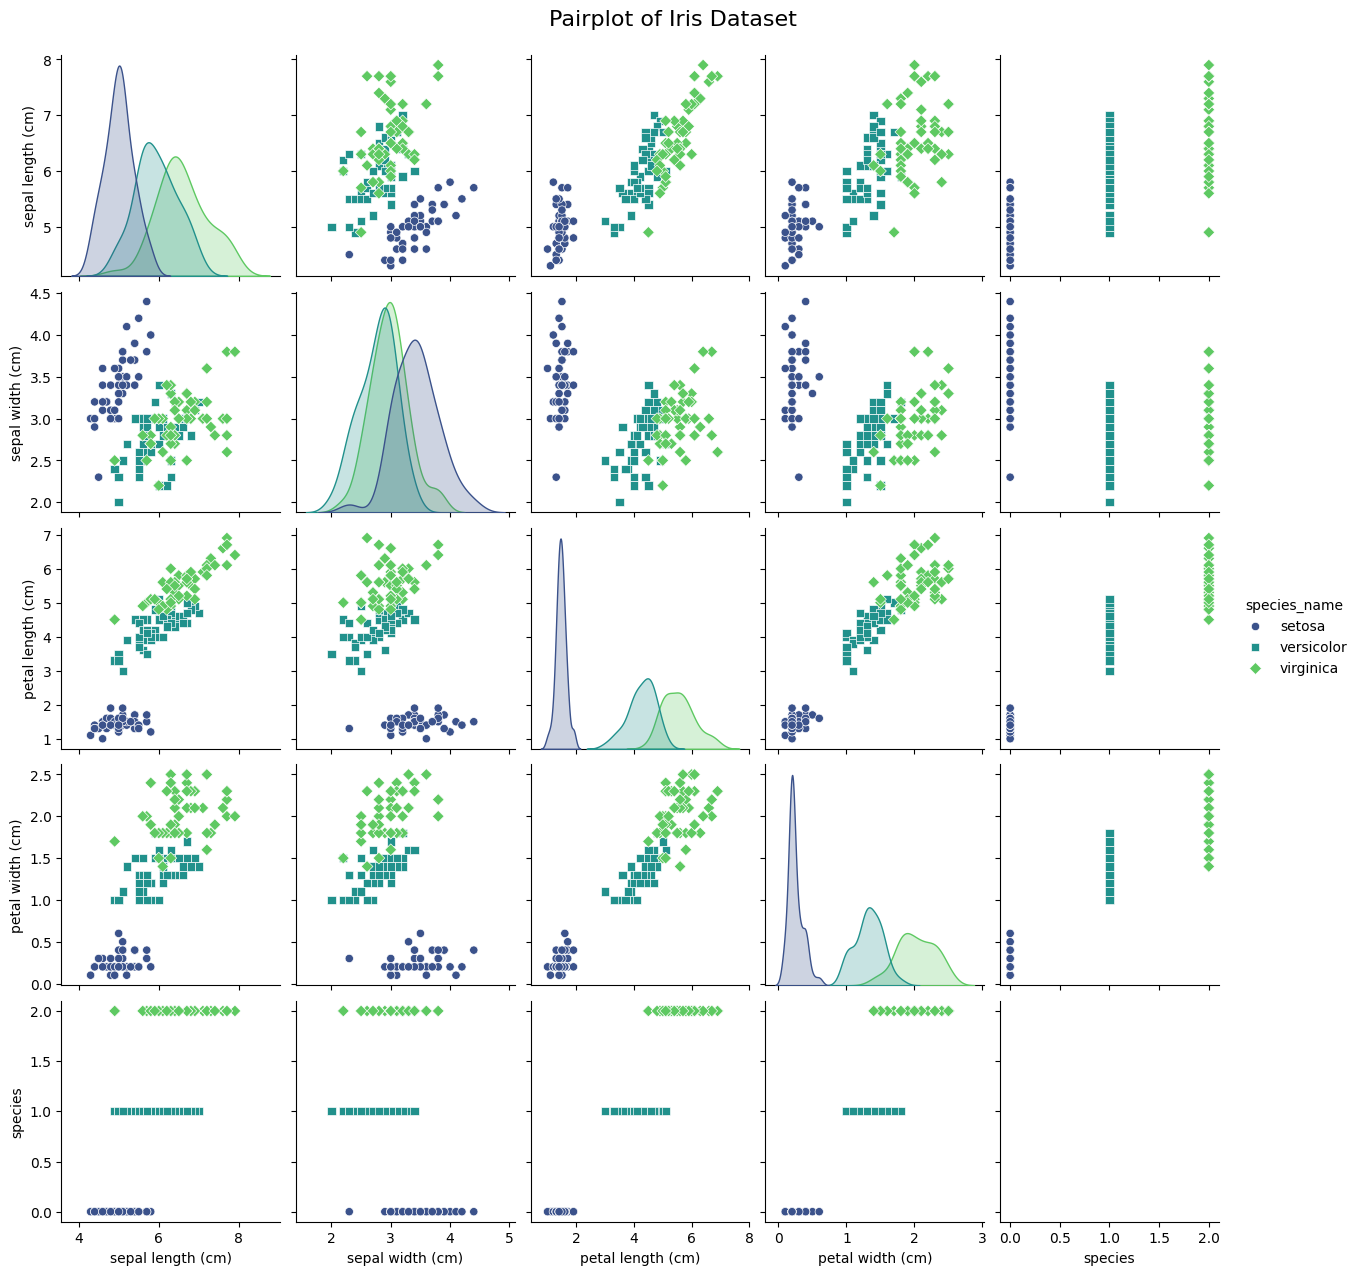

In [ ]:
# Cell 4: Pairplot with Seaborn (classic visualization)
plt.figure(figsize=(10, 8))
sns.pairplot(df, hue='species_name', palette='viridis', markers=["o", "s", "D"])
plt.suptitle('Pairplot of Iris Dataset', y=1.02, fontsize=16)
plt.show()

In [ ]:
# Cell 5: Interactive 3D Scatter Plot with Plotly
fig = px.scatter_3d(df,
                    x='sepal length (cm)',
                    y='sepal width (cm)',
                    z='petal length (cm)',
                    color='species_name',
                    size='petal width (cm)',
                    hover_data=['species'],
                    title='3D Interactive View of Iris Dataset',
                    labels={'species_name': 'Species'},
                    color_discrete_sequence=px.colors.qualitative.Set1)

fig.update_layout(scene=dict(xaxis_title='Sepal Length (cm)',
                             yaxis_title='Sepal Width (cm)',
                             zaxis_title='Petal Length (cm)'))
fig.show()

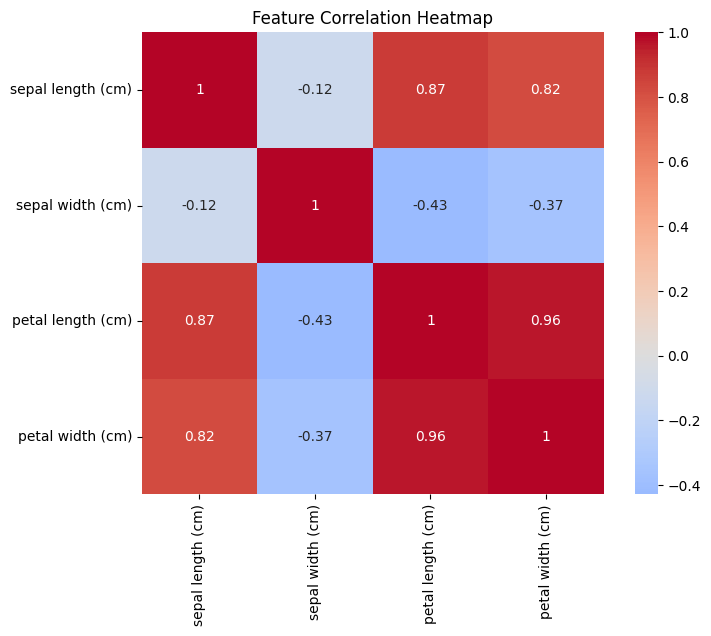

In [ ]:
# Cell 6: Correlation Heatmap
plt.figure(figsize=(8, 6))
corr = df[iris.feature_names].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
# Cell 7: PCA for 2D visualization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris.data)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['species'] = iris.target
pca_df['species_name'] = pca_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Plot PCA result
fig = px.scatter(pca_df, x='PC1', y='PC2', color='species_name',
                 title=f'PCA of Iris Dataset (Explained variance: {pca.explained_variance_ratio_.sum():.2%})',
                 color_discrete_sequence=px.colors.qualitative.Vivid)
fig.show()

In [ ]:
# Cell 8: K-Means Clustering (unsupervised - let's see if it recovers the 3 species)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

pca_df['kmeans_cluster'] = clusters

fig = px.scatter(pca_df, x='PC1', y='PC2', color='kmeans_cluster',
                 symbol='species_name',
                 title='K-Means Clustering (3 clusters) vs True Species',
                 labels={'kmeans_cluster': 'Predicted Cluster', 'species_name': 'True Species'})
fig.show()

# Silhouette score
score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score (higher is better): {score:.4f}")

Silhouette Score (higher is better): 0.4799


In [ ]:
# Cell 9: Compare predicted clusters vs actual species
cross_tab = pd.crosstab(pca_df['species_name'], pca_df['kmeans_cluster'],
                        rownames=['True Species'], colnames=['Predicted Cluster'])
print("Contingency Table (True vs Predicted):")
print(cross_tab)

Contingency Table (True vs Predicted):
Predicted Cluster   0   1   2
True Species                 
setosa              0  33  17
versicolor         46   0   4
virginica          50   0   0


new


In [ ]:
# Cell 1: Import required libraries (Iris-focused)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Scikit-learn
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Interactive visualization
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

print("All libraries imported successfully!")

All libraries imported successfully!


In [ ]:
# Cell 2: Load the famous Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = df['species'].map({
    0: 'setosa',
    1: 'versicolor',
    2: 'virginica'
})

print("Iris dataset loaded successfully!")
print(f"Shape: {df.shape}")
df.head()

Iris dataset loaded successfully!
Shape: (150, 6)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
# Cell 3: Basic dataset info & statistics
print("Dataset Info:")
df.info()
print("\nDescriptive Statistics:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
 5   species_name       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB

Descriptive Statistics:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<Figure size 1200x1000 with 0 Axes>

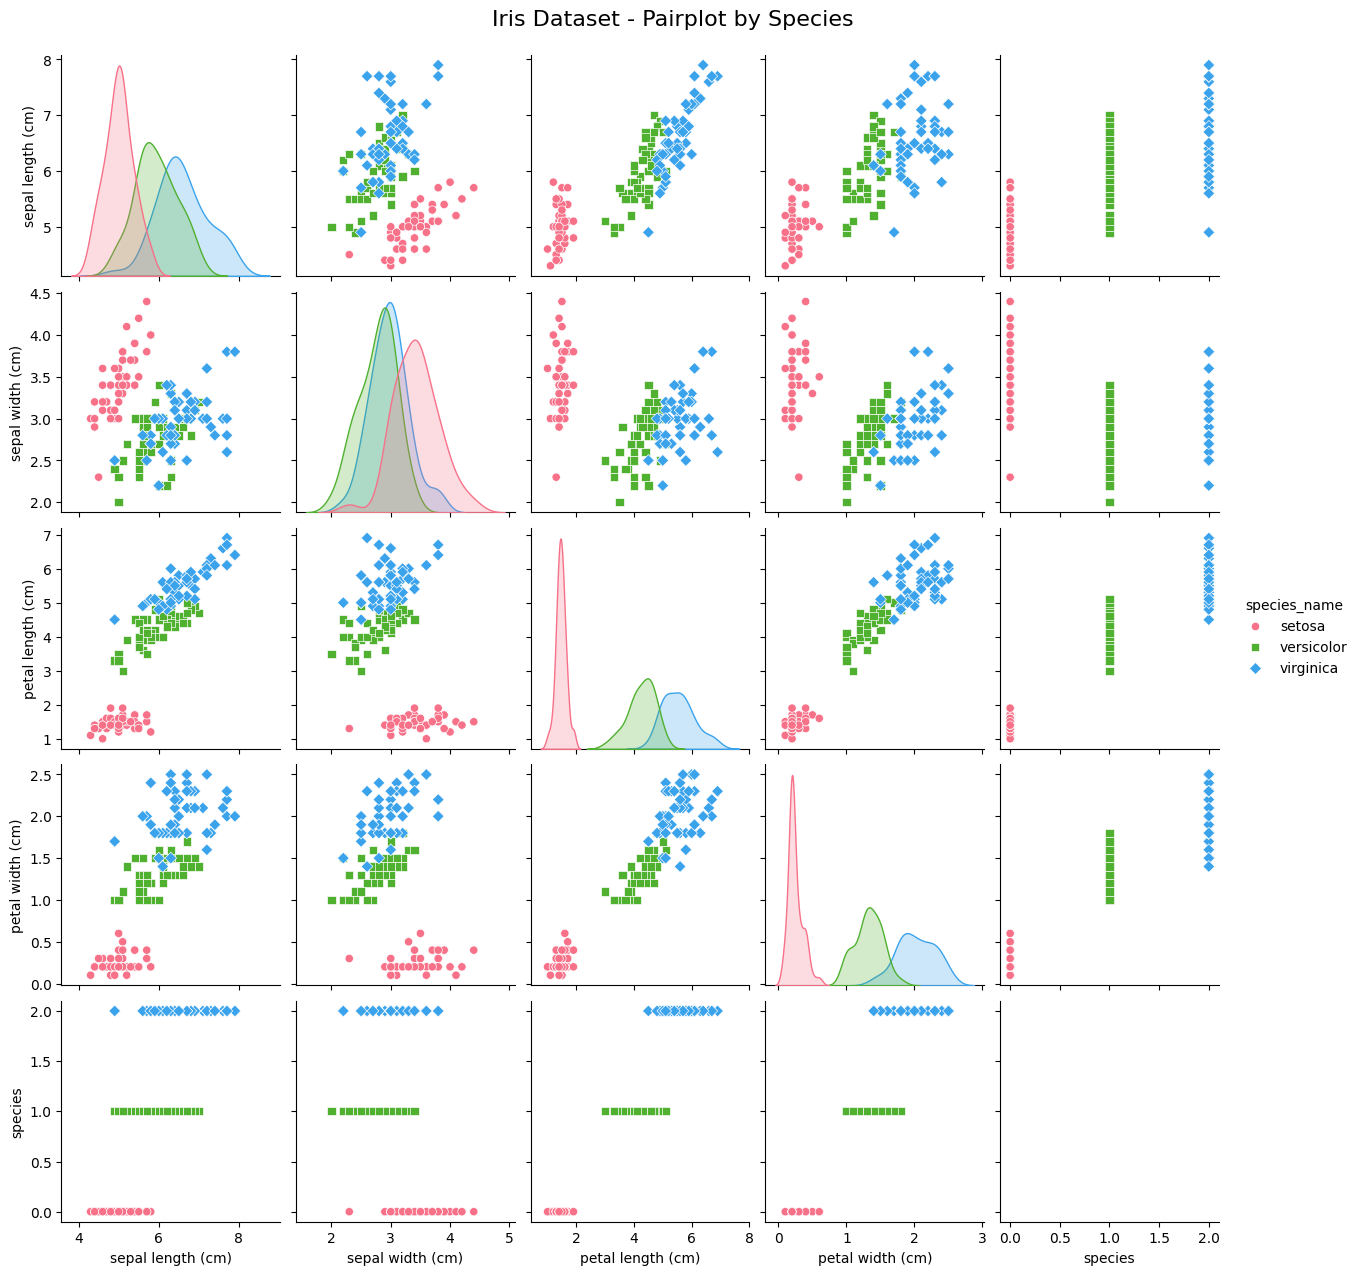

In [ ]:
# Cell 4: Classic Seaborn Pairplot (the most famous Iris visualization)
plt.figure(figsize=(12, 10))
sns.pairplot(df, hue='species_name', palette='husl', markers=['o', 's', 'D'])
plt.suptitle('Iris Dataset - Pairplot by Species', y=1.02, fontsize=16)
plt.show()

<Figure size 1200x1000 with 0 Axes>

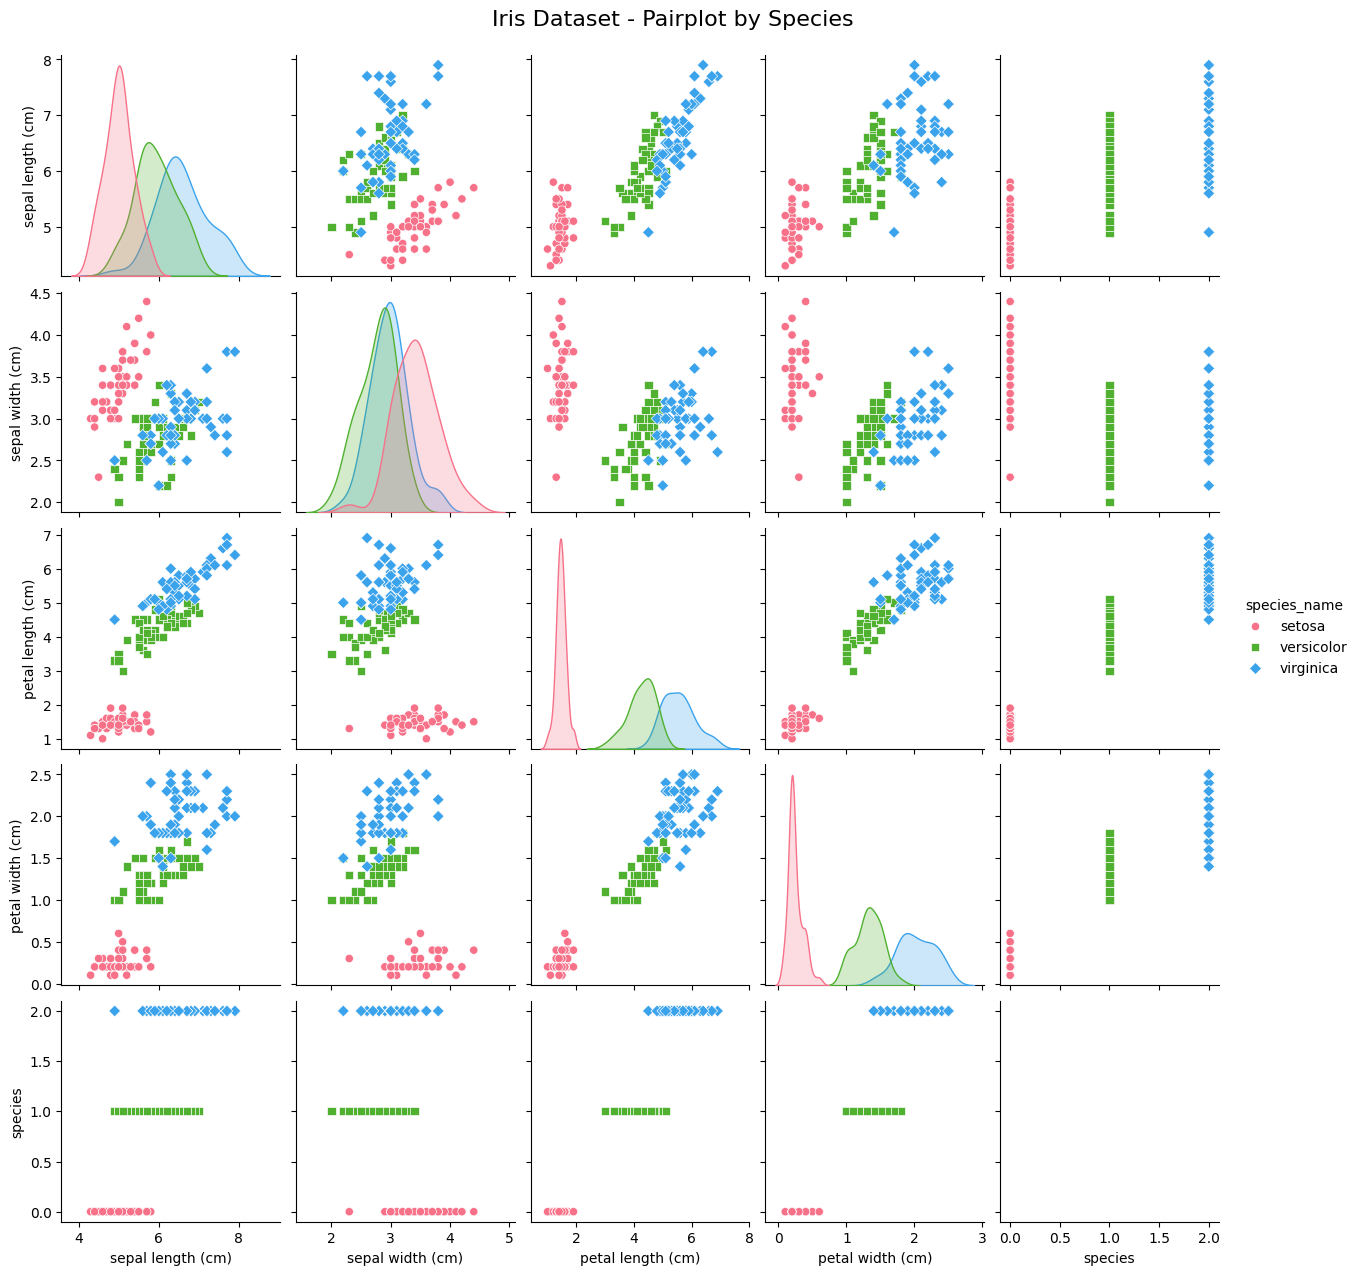

In [ ]:
# Cell 4: Classic Seaborn Pairplot (the most famous Iris visualization)
plt.figure(figsize=(12, 10))
sns.pairplot(df, hue='species_name', palette='husl', markers=['o', 's', 'D'])
plt.suptitle('Iris Dataset - Pairplot by Species', y=1.02, fontsize=16)
plt.show()

In [ ]:
# Cell 5: Interactive 3D Scatter Plot with Plotly
fig = px.scatter_3d(
    df,
    x='sepal length (cm)',
    y='sepal width (cm)',
    z='petal length (cm)',
    color='species_name',
    size='petal width (cm)',
    hover_name='species_name',
    title='Interactive 3D View of Iris Flowers',
    labels={'species_name': 'Species'},
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(scene=dict(
    xaxis_title='Sepal Length (cm)',
    yaxis_title='Sepal Width (cm)',
    zaxis_title='Petal Length (cm)'
))
fig.show()

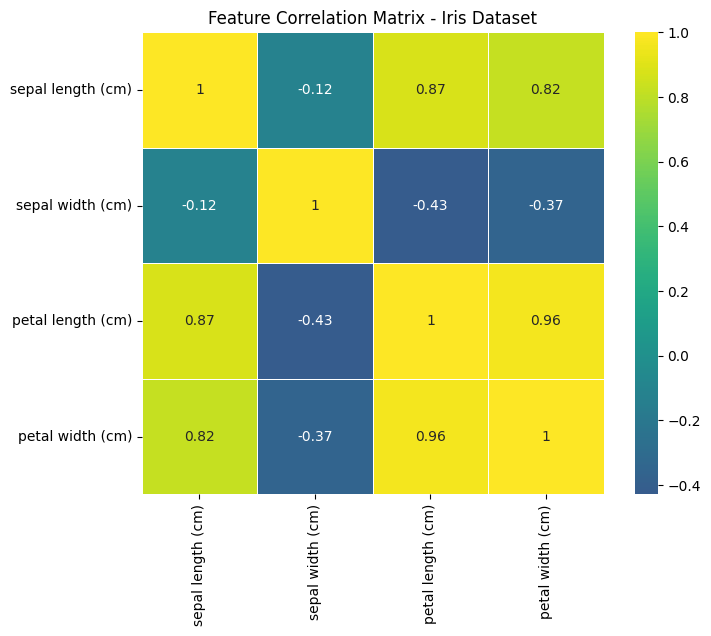

In [ ]:
# Cell 6: Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df[iris.feature_names].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', center=0, square=True, linewidths=0.5)
plt.title('Feature Correlation Matrix - Iris Dataset')
plt.show()

In [ ]:
# Cell 7: PCA - Reduce to 2D for visualization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris.data)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['species'] = iris.target
pca_df['species_name'] = pca_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Interactive PCA Plot
fig = px.scatter(pca_df, x='PC1', y='PC2', color='species_name',
                 title=f'Iris Dataset in 2D via PCA<br>(Explained Variance: {sum(pca.explained_variance_ratio_):.2%})',
                 color_discrete_sequence=px.colors.qualitative.Bold,
                 hover_data=['species'])

fig.update_traces(marker=dict(size=10, line=dict(width=1, color='DarkSlateGrey')))
fig.show()

In [ ]:
# Cell 8: K-Means Clustering (Unsupervised) - Can it rediscover the 3 species?
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
pca_df['cluster'] = clusters

# Plot clusters vs true labels
fig = px.scatter(pca_df, x='PC1', y='PC2',
                 color='cluster',
                 symbol='species_name',
                 title='K-Means Clustering (Unsupervised) vs True Species',
                 labels={'cluster': 'Predicted Cluster', 'species_name': 'True Species'},
                 color_discrete_sequence=px.colors.qualitative.Safe)

fig.update_traces(marker=dict(size=12))
fig.show()

# Evaluate clustering quality
sil_score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score (K-Means): {sil_score:.4f} (closer to 1 = better)")

Silhouette Score (K-Means): 0.4599 (closer to 1 = better)


In [ ]:
# Cell 9: Compare True Labels vs Predicted Clusters
cross_tab = pd.crosstab(pca_df['species_name'], pca_df['cluster'],
                        rownames=['True Species'], colnames=['Predicted Cluster'])

print("True Species vs K-Means Predicted Clusters:")
print(cross_tab)

# Bonus: Show how well K-Means recovered the classes
accuracy_like = np.max(cross_tab.values) / len(df)
print(f"\nK-Means matched ~{accuracy_like:.1%} of true labels (even without knowing them!)")# Cell 9: Compare True Labels vs Predicted Clusters
cross_tab = pd.crosstab(pca_df['species_name'], pca_df['cluster'],
                        rownames=['True Species'], colnames=['Predicted Cluster'])

print("True Species vs K-Means Predicted Clusters:")
print(cross_tab)

# Bonus: Show how well K-Means recovered the classes
accuracy_like = np.max(cross_tab.values) / len(df)
print(f"\nK-Means matched ~{accuracy_like:.1%} of true labels (even without knowing them!)")

True Species vs K-Means Predicted Clusters:
Predicted Cluster   0   1   2
True Species                 
setosa              0  50   0
versicolor         39   0  11
virginica          14   0  36

K-Means matched ~33.3% of true labels (even without knowing them!)
True Species vs K-Means Predicted Clusters:
Predicted Cluster   0   1   2
True Species                 
setosa              0  50   0
versicolor         39   0  11
virginica          14   0  36

K-Means matched ~33.3% of true labels (even without knowing them!)


In [ ]:
# Cell 10: Dashboard - All-in-One Summary
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Sepal Features', 'Petal Features', 'PCA 2D Projection', 'Species Distribution'),
    specs=[[{"type": "scatter"}, {"type": "scatter"}],
           [{"type": "scatter"}, {"type": "pie"}]]
)

# Sepal
fig.add_trace(go.Scatter(x=df['sepal length (cm)'], y=df['sepal width (cm)'],
                         mode='markers', marker=dict(color=df['species'], colorscale='Viridis'),
                         name='Sepal', showlegend=False), row=1, col=1)

# Petal
fig.add_trace(go.Scatter(x=df['petal length (cm)'], y=df['petal width (cm)'],
                         mode='markers', marker=dict(color=df['species'], colorscale='Plasma'),
                         name='Petal', showlegend=False), row=1, col=2)

# PCA
fig.add_trace(go.Scatter(x=pca_df['PC1'], y=pca_df['PC2'],
                         mode='markers', marker=dict(color=df['species'], colorscale='Cividis'),
                         name='PCA', showlegend=False), row=2, col=1)

# Pie chart of species
species_counts = df['species_name'].value_counts()
fig.add_trace(go.Pie(labels=species_counts.index, values=species_counts.values,
                     name="Species", marker_colors=px.colors.qualitative.Pastel),
              row=2, col=2)

fig.update_layout(height=800, title_text="Iris Dataset - Complete Visual Summary")
fig.show()

In [ ]:
#The dataset to be downloaded from
https://www.kaggle.com/datasets/slwessels/crime-statistics-for-south-africa


In [ ]:
! pip install kaggle                #Importing kaggle library to colab python

! mkdir ~/.kaggle                   #Make a kaggle directory in Colab

! cp kaggle.json ~/.kaggle/         #Copy the uploaded kaggle.json to this kaggle directory in colab

! chmod 600 ~/.kaggle/kaggle.json   #Provide rights for your colab to communicate with kaggle